In [99]:
import scipy
from scipy.fft import fft, fftfreq
from scipy import signal

Apply scipy butterworth bandpass filter and remove epochs with amplitudes larger than 3000mV.  
Filtering out the epochs that surpass 3000mV as these values are noise as opposed to physiological data.  
It filters out data below 0.2Hz and above 100Hz using a bandpass filter and also filters out epochs above 3000mV.  
Filter out low-frequency drifts and frequencies above 50Hz.  

The next for loop is to loop through the actual data values in each epoch and see if any of the points exceed 3000mV, if they do then that epoch is removed from the analysis because physiological data < 3000mV so this is most likely noise. So, channel threshold is just the data that exceeds this, the last two commands in that script remove the epochs with noise and return the clean epochs.

In [100]:
order = 3
sampling_rate = 250.4
nyquist = 125.2
low = 0.2/nyquist
high = 100/nyquist
noise_limit = 3000
epoch_bins = 1252 #5 seconds * sampling rate

In [101]:
def butter_bandpass(unfiltered_data):
    
    butter_b, butter_a = signal.butter(order, [low, high], btype='band', analog = False)
    
    filtered_data = signal.filtfilt(butter_b, butter_a, unfiltered_data)
    
    print("filtered_data")
    
    for channel in filtered_data:
        for value in channel:
            if value >= noise_limit:
                channel_threshold.append(value)
            else:
                pass 
            
    print("channel_threshold")
            
    remove_duplicates = sorted(list(set(channel_threshold)))
    print("remove_duplicates")
    channels_without_noise = [i for j, i in enumerate(filtered_data) if j not in remove_duplicates]
    print("channels_without_noise")
    return channels_without_noise 

In [102]:
def save_filtered_data(filename, directory, save_as_name):

    os.chdir(directory)

    animal = np.load(filename)
    
    # start and end values should be changed according to the recording
    start = 35246305
    end = 56880864

    unfiltered_data = animal[:, start:end]
    
    filtered_data = np.array(butter_bandpass(unfiltered_data))
    
    np.save(save_as_name, filtered_data)

    print("SAVED")

In [103]:
filename = 'TAINI_1047_S7098-D2-2021_07_01-0000.npy'
directory = '/Volumes/Macintosh HD/Users/gokceuzun/Desktop/4. SENE/Honors Project/S7098'
save_as_name = 'filtered_TAINI_1047_S7098-D2-2021_07_01-0000'

In [104]:
save_filtered_data(filename, directory, save_as_name)

filtered_data
channel_threshold
remove_duplicates
channels_without_noise
SAVED


In [105]:
os.listdir()

['.DS_Store',
 'brain_states_1_S7098.pkl',
 'TAINI_1047_S7098-D2-2021_07_01-0000.npy',
 'TAINI_1047_S7098-BL-2021_06_28-0000.npy',
 'S7098_saline.pkl',
 'S7098_etx.pkl',
 'filtered_TAINI_1047_S7098-D2-2021_07_01-0000.npy',
 'brain_states_2_S7098.pkl']

In [107]:
filtered_data = np.load('filtered_TAINI_1047_S7098-D2-2021_07_01-0000.npy')

In [108]:
filtered_data

array([[-10.77864074, -10.76265606, -11.04122172, ...,  21.62856593,
         20.77143892,  20.93956405],
       [  0.16912928,   3.20795691,   0.13134939, ...,   4.87504285,
          4.39576092,   4.39510511],
       [-11.51564359,  -7.67905617,  -2.64237135, ...,  13.30704954,
         12.67811673,  11.77435367],
       ...,
       [-11.0197583 ,  -8.35622519,  -3.89389072, ...,  21.97465129,
         19.90017642,  18.80718108],
       [  2.56084044,   3.5106953 ,   3.6237463 , ...,   6.60535177,
          4.36835049,   4.25794881],
       [ -8.32465416,  -5.43798598,  -5.39973734, ...,  13.44908003,
         14.20306503,  13.23660684]])

## <span style="color:blue">*Plotting the whole filtered data:* </span> 

Creating RawArray with float64 data, n_channels=16, n_times=21634559
    Range : 0 ... 21634558 =      0.000 ... 86399.992 secs
Ready.


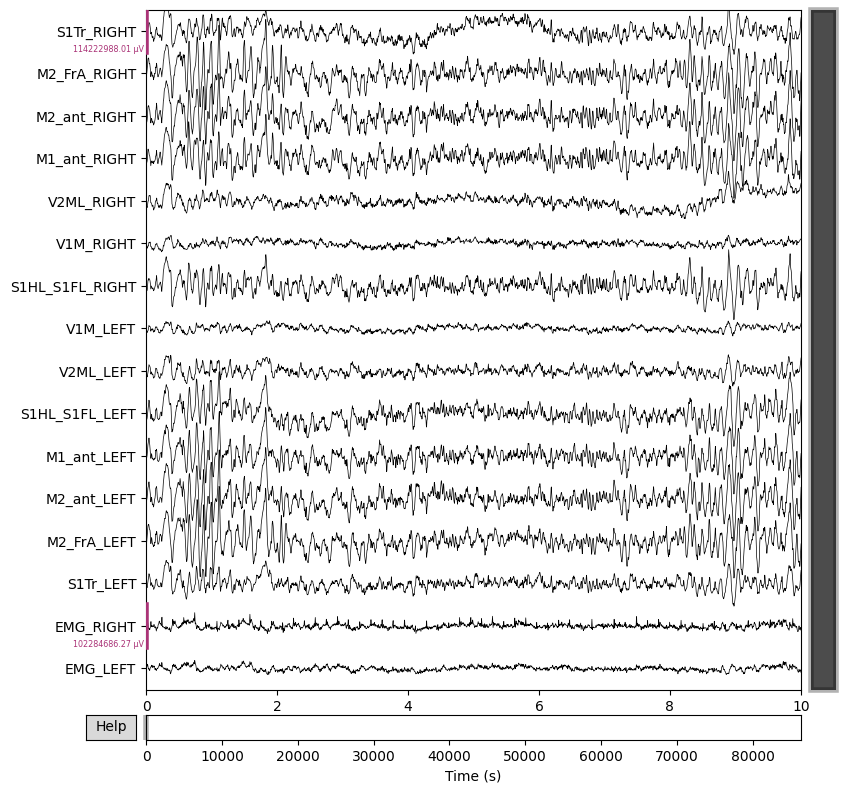

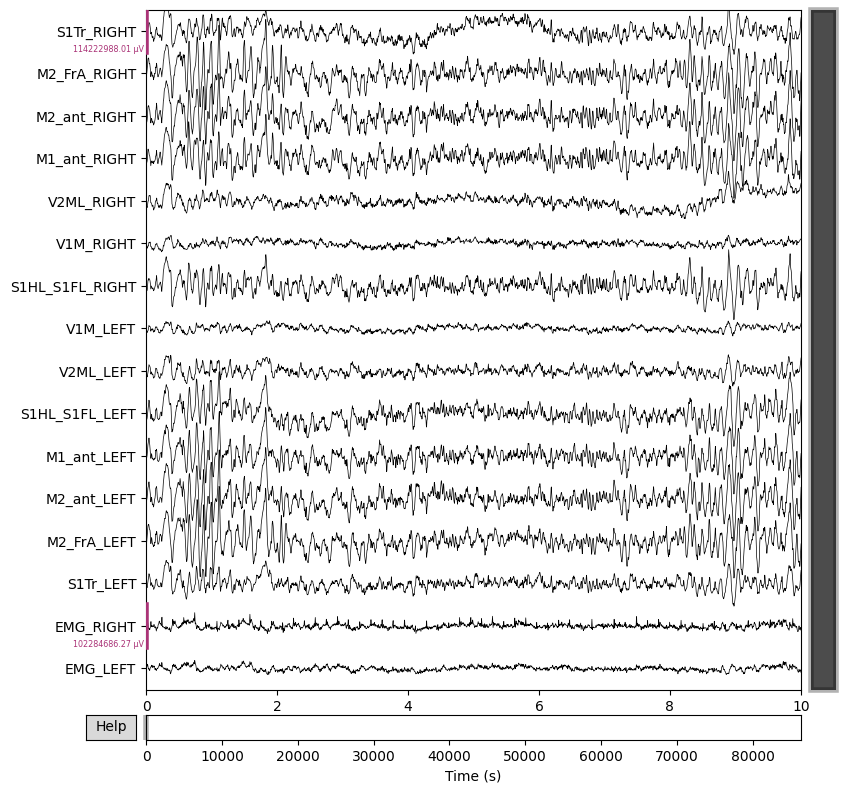

In [109]:
import mne
import matplotlib.pyplot

ch_names = ['S1Tr_RIGHT', 'EMG_RIGHT', 'M2_FrA_RIGHT','M2_ant_RIGHT','M1_ant_RIGHT', 'V2ML_RIGHT',
            'V1M_RIGHT', 'S1HL_S1FL_RIGHT', 'V1M_LEFT', 'V2ML_LEFT', 'S1HL_S1FL_LEFT',
            'M1_ant_LEFT','M2_ant_LEFT','M2_FrA_LEFT', 'EMG_LEFT', 'S1Tr_LEFT']

ch_types = ['eeg', 'emg', 'eeg', 'eeg', 'eeg', 'eeg',
           'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
           'eeg', 'eeg', 'eeg', 'emg', 'eeg']

raw_info = mne.create_info(ch_names, sfreq = 250.4, ch_types=ch_types)

raw = mne.io.RawArray(filtered_data, raw_info)

raw.plot(scalings="auto")